in this file, i will use house pricing dataset to train a model for price preditction of houses

In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [216]:
df = pd.read_csv('1632300362534233.csv') 
df.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
0,63,1,True,True,True,Shahran,1.850000e+09,61666.67
1,60,1,True,True,True,Shahran,1.850000e+09,61666.67
2,79,2,True,True,True,Pardis,5.500000e+08,18333.33
3,95,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33
4,123,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33


In [217]:
df.describe()


,Room,Price,Price(USD)
count,3479.000000,3.479000e+03,3.479000e+03
mean,2.079908,5.359023e+09,1.786341e+05
std,0.758275,8.099935e+09,2.699978e+05
min,0.000000,3.600000e+06,1.200000e+02
25%,2.000000,1.418250e+09,4.727500e+04
50%,2.000000,2.900000e+09,9.666667e+04
75%,2.000000,6.000000e+09,2.000000e+05
max,5.000000,9.240000e+10,3.080000e+06


In [218]:
print(df.dtypes)  # Shows the data type of each column

Area           object
Room            int64
Parking          bool
Warehouse        bool
Elevator         bool
Address        object
Price         float64
Price(USD)    float64
dtype: object


In [219]:
# convert area value types to numeric
df['Area'] = pd.to_numeric(df['Area'], errors='coerce')

In [220]:
print(df.isnull().sum())  # Shows the number of missing values per column

Area           6
Room           0
Parking        0
Warehouse      0
Elevator       0
Address       23
Price          0
Price(USD)     0
dtype: int64


In [221]:

rows_with_null = df[df.isnull().any(axis=1)]
rows_with_null

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)
43,60.0,2,True,True,True,NaN,2.650000e+09,88333.33
570,NaN,2,True,True,True,Ostad Moein,3.310000e+09,110333.33
662,85.0,2,True,True,True,NaN,1.955000e+09,65166.67
706,117.0,2,True,True,True,NaN,6.500000e+09,216666.67
709,NaN,3,True,True,True,Pasdaran,1.616000e+10,538666.67
807,NaN,2,True,True,False,Damavand,7.000000e+09,233333.33
1108,77.0,2,True,True,False,NaN,2.020000e+09,67333.33
1109,71.0,1,True,True,True,NaN,2.300000e+09,76666.67
1577,100.0,2,True,True,True,NaN,3.100000e+09,103333.33
1604,NaN,2,True,True,True,Gheitarieh,8.700000e+09,290000.00


In [222]:
# cleaning the data by dropping rows with missing values and checking the result
df_cleaned = df.dropna()
print(df_cleaned.isnull().sum())  # Shows the number of missing values per column

Area          0
Room          0
Parking       0
Warehouse     0
Elevator      0
Address       0
Price         0
Price(USD)    0
dtype: int64


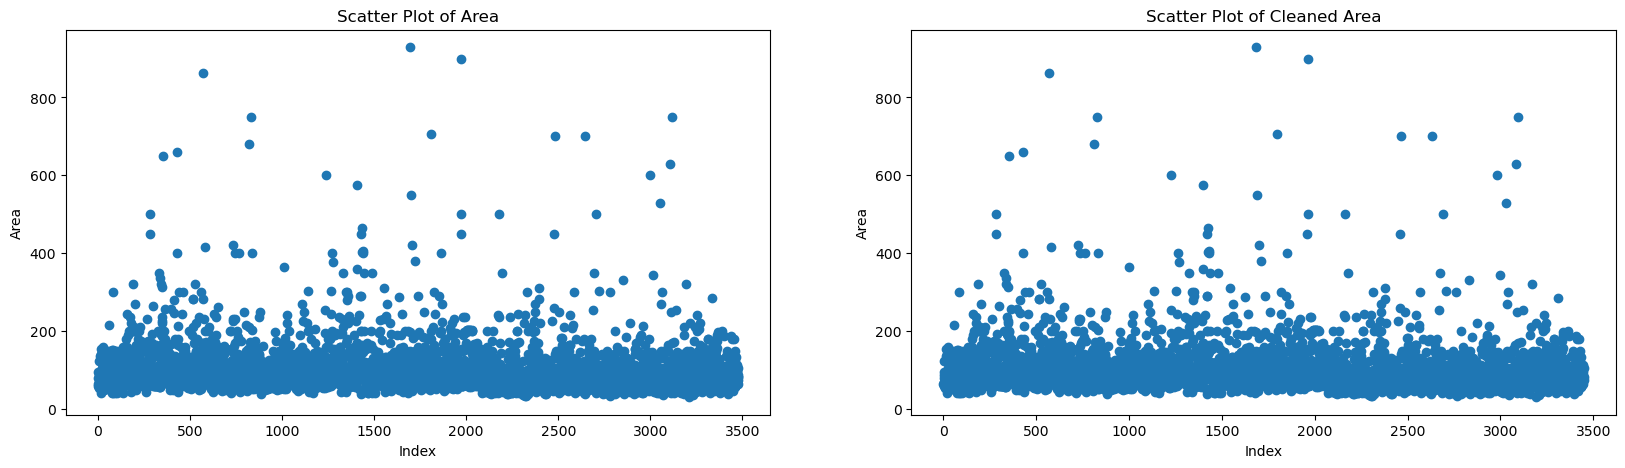

In [223]:
fig, ax = plt.subplots(1,2, figsize=(20,5))

ax[0].scatter(range(len(df['Area'])), df['Area'])
ax[0].set_xlabel('Index')
ax[0].set_ylabel('Area')
ax[0].set_title('Scatter Plot of Area')

ax[1].scatter(range(len(df_cleaned['Area'])), df_cleaned['Area'])
ax[1].set_xlabel('Index')
ax[1].set_ylabel('Area')
ax[1].set_title('Scatter Plot of Cleaned Area')

plt.show()

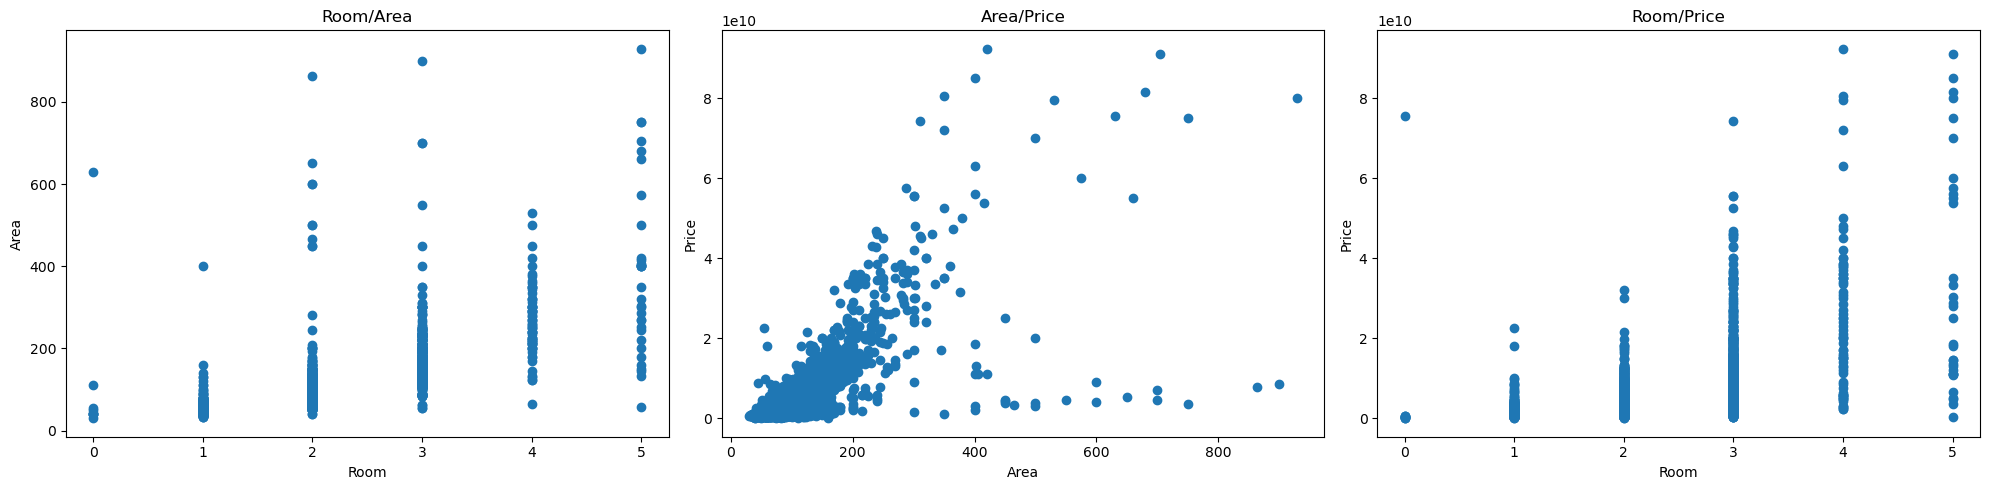

In [224]:

fig, ax = plt.subplots(1,3, figsize=(20,5))
ax[0].scatter(df_cleaned['Room'], df_cleaned['Area'])
ax[0].set_xlabel('Room')
ax[0].set_ylabel('Area')
ax[0].set_title('Room/Area')
# ax[0].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[1].scatter(df_cleaned['Area'], df_cleaned['Price'])
ax[1].set_title('Area/Price')
ax[1].set_xlabel('Area')
ax[1].set_ylabel('Price')
# ax[1].ticklabel_format(style='sci', axis='y', scilimits=(0,0))

ax[2].scatter(df_cleaned['Room'], df_cleaned['Price'])
ax[2].set_title('Room/Price')
ax[2].set_xlabel('Room')
ax[2].set_ylabel('Price')
# ax[2].ticklabel_format(style='sci', axis='y', scilimits=(0,0))
plt.tight_layout()

plt.show()

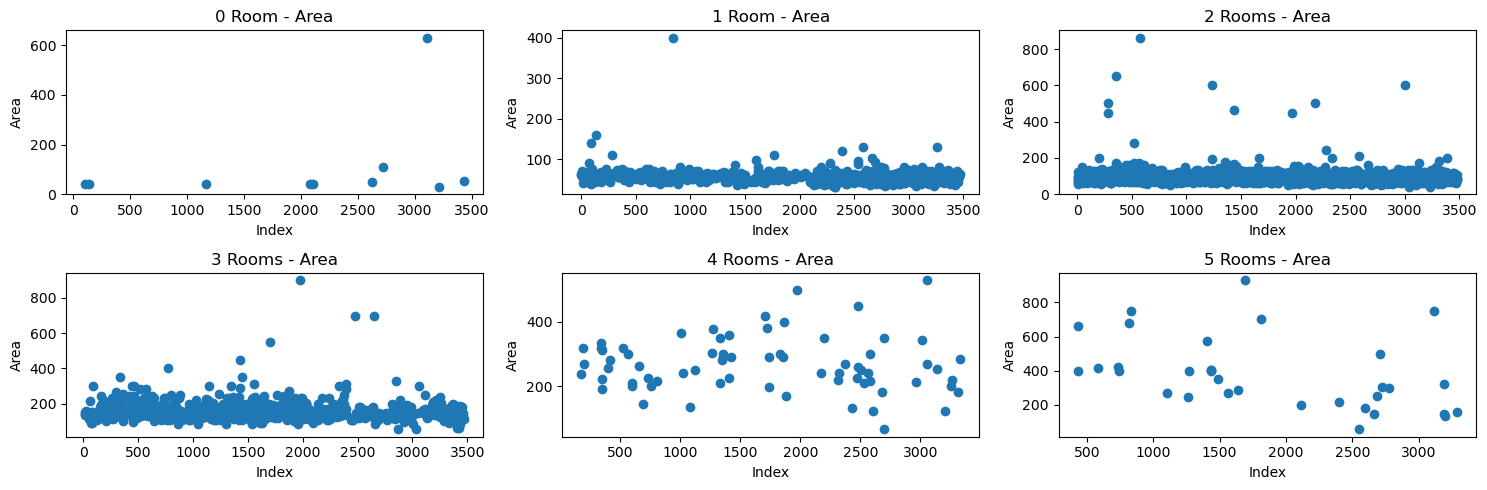

In [225]:
df_room_0 = df_cleaned[df_cleaned['Room'] == 0]
df_room_1 = df_cleaned[df_cleaned['Room'] == 1]
df_room_2 = df_cleaned[df_cleaned['Room'] == 2]
df_room_3 = df_cleaned[df_cleaned['Room'] == 3]
df_room_4 = df_cleaned[df_cleaned['Room'] == 4]
df_room_5 = df_cleaned[df_cleaned['Room'] == 5]

fig, ax = plt.subplots(2,3, figsize=(15,5))
ax[0,0].scatter(df_room_0.index, df_room_0['Area'])
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Area')
ax[0,0].set_title('0 Room - Area')
ax[0,1].scatter(df_room_1.index, df_room_1['Area'])
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Area')
ax[0,1].set_title('1 Room - Area')
ax[0,2].scatter(df_room_2.index, df_room_2['Area'])
ax[0,2].set_xlabel('Index')
ax[0,2].set_ylabel('Area')
ax[0,2].set_title('2 Rooms - Area')
ax[1,0].scatter(df_room_3.index, df_room_3['Area'])
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Area')
ax[1,0].set_title('3 Rooms - Area')
ax[1,1].scatter(df_room_4.index, df_room_4['Area'])
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Area')
ax[1,1].set_title('4 Rooms - Area')
ax[1,2].scatter(df_room_5.index, df_room_5['Area'])
ax[1,2].set_xlabel('Index')
ax[1,2].set_ylabel('Area')
ax[1,2].set_title('5 Rooms - Area')    
plt.tight_layout()
plt.show()

In [226]:
# calculate mean and mse of area for each room number

mean_area_by_room = df_cleaned.groupby('Room')['Area'].mean()
print("Mean Area by Room:\n", mean_area_by_room)

mse_area_by_room = df_cleaned.groupby('Room')['Area'].apply(lambda x: np.mean((x - x.mean())**2))
print("MSE Area by Room:\n", mse_area_by_room)

Mean Area by Room:
 Room
0    107.700000
1     57.210762
2     93.071723
3    161.412329
4    266.785714
5    382.878788
Name: Area, dtype: float64
MSE Area by Room:
 Room
0    30757.210000
1      332.279944
2     1556.627983
3     3731.727245
4     7269.939796
5    42721.742883
Name: Area, dtype: float64


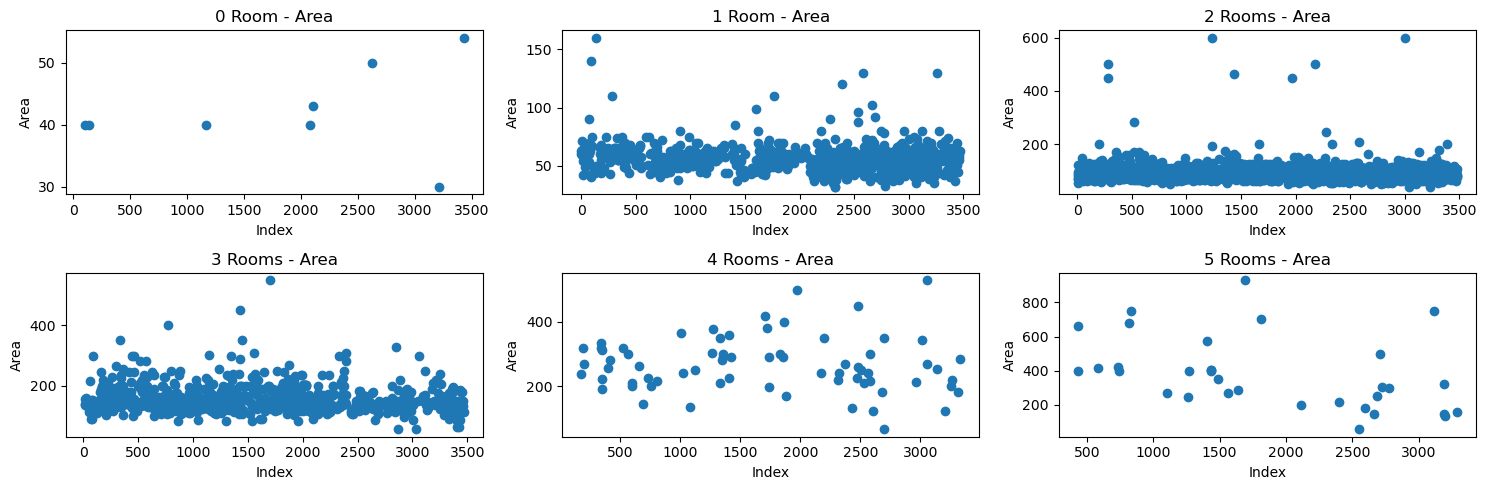

In [227]:
# remove data manually based on plots

df_cleaned = df_cleaned[~((df_cleaned['Room'] == 0) & (df_cleaned['Area'] > 100))]
df_cleaned = df_cleaned[~((df_cleaned['Room'] == 1) & (df_cleaned['Area'] > 300))]
df_cleaned = df_cleaned[~((df_cleaned['Room'] == 2) & (df_cleaned['Area'] > 600))]
df_cleaned = df_cleaned[~((df_cleaned['Room'] == 3) & (df_cleaned['Area'] > 600))]

# Select data where Room == 0 AFTER filtering
df_room_0 = df_cleaned[df_cleaned['Room'] == 0]
df_room_1 = df_cleaned[df_cleaned['Room'] == 1]
df_room_2 = df_cleaned[df_cleaned['Room'] == 2]
df_room_3 = df_cleaned[df_cleaned['Room'] == 3]
df_room_4 = df_cleaned[df_cleaned['Room'] == 4]
df_room_5 = df_cleaned[df_cleaned['Room'] == 5]

fig, ax = plt.subplots(2,3, figsize=(15,5))
ax[0,0].scatter(df_room_0.index, df_room_0['Area'])
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Area')
ax[0,0].set_title('0 Room - Area')

ax[0,1].scatter(df_room_1.index, df_room_1['Area'])
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Area')
ax[0,1].set_title('1 Room - Area')

ax[0,2].scatter(df_room_2.index, df_room_2['Area'])
ax[0,2].set_xlabel('Index')
ax[0,2].set_ylabel('Area')
ax[0,2].set_title('2 Rooms - Area')

ax[1,0].scatter(df_room_3.index, df_room_3['Area'])
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Area')
ax[1,0].set_title('3 Rooms - Area')

ax[1,1].scatter(df_room_4.index, df_room_4['Area'])
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Area')
ax[1,1].set_title('4 Rooms - Area')

ax[1,2].scatter(df_room_5.index, df_room_5['Area'])
ax[1,2].set_xlabel('Index')
ax[1,2].set_ylabel('Area')
ax[1,2].set_title('5 Rooms - Area')  

plt.tight_layout()
plt.show()

In [228]:
df_cleaned[(df_cleaned['Room'] < 2) & (df_cleaned['Area'] > 200)]

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD)


In [229]:
# create a list of addresses
address = df_cleaned['Address'].unique()
len(address)

192

In [230]:
# Compute mean target value per address
address_means = df_cleaned.groupby('Address')['Price'].mean()
address_means

Address
Abazar         8.594130e+09
Abbasabad      3.230000e+09
Absard         4.040000e+09
Abuzar         1.528333e+09
Afsarieh       1.866667e+09
                   ...     
Yousef Abad    7.031974e+09
Zafar          1.317440e+10
Zaferanieh     2.357515e+10
Zargandeh      7.068000e+09
Zibadasht      4.350000e+09
Name: Price, Length: 192, dtype: float64

In [231]:
df_cleaned['Address_Encoded'] = df_cleaned['Address'].map(address_means)

df_cleaned.head()

,Area,Room,Parking,Warehouse,Elevator,Address,Price,Price(USD),Address_Encoded
0,63.0,1,True,True,True,Shahran,1.850000e+09,61666.67,2.985754e+09
1,60.0,1,True,True,True,Shahran,1.850000e+09,61666.67,2.985754e+09
2,79.0,2,True,True,True,Pardis,5.500000e+08,18333.33,7.778219e+08
3,95.0,2,True,True,True,Shahrake Qods,9.025000e+08,30083.33,9.009217e+08
4,123.0,2,True,True,True,Shahrake Gharb,7.000000e+09,233333.33,1.196988e+10


In [232]:
# calculate mean and mse of area for each room number

mean_area_by_room = df_cleaned.groupby('Room')['Area'].mean()
print("Mean Area by Room:\n", mean_area_by_room)

mse_area_by_room = df_cleaned.groupby('Room')['Area'].apply(lambda x: np.mean((x - x.mean())**2))
print("MSE Area by Room:\n", mse_area_by_room)

Mean Area by Room:
 Room
0     42.125000
1     56.697605
2     92.386364
3    158.914718
4    266.785714
5    382.878788
Name: Area, dtype: float64
MSE Area by Room:
 Room
0       46.109375
1      156.609156
2     1091.362087
3     2192.518174
4     7269.939796
5    42721.742883
Name: Area, dtype: float64


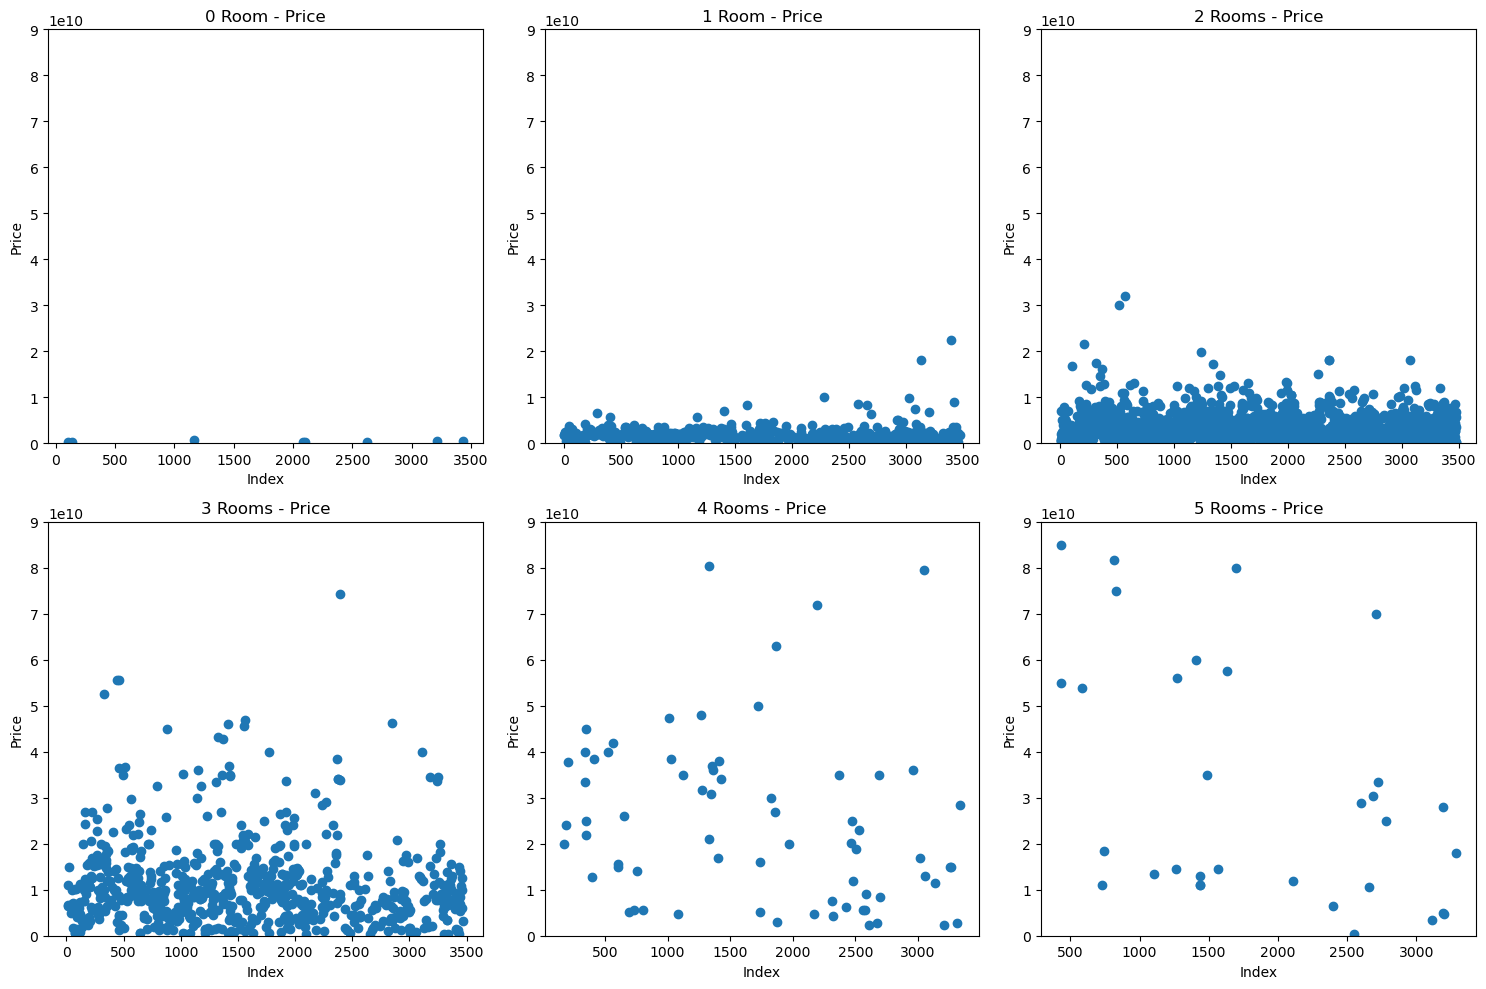

In [233]:
# plot room vs price

fig, ax = plt.subplots(2,3, figsize=(15,10))
ax[0,0].scatter(df_room_0.index, df_room_0['Price'])
ax[0,0].set_xlabel('Index')
ax[0,0].set_ylabel('Price')
ax[0,0].set_title('0 Room - Price')
ax[0,0].set_ylim(0,9e10)

ax[0,1].scatter(df_room_1.index, df_room_1['Price'])
ax[0,1].set_xlabel('Index')
ax[0,1].set_ylabel('Price')
ax[0,1].set_title('1 Room - Price')
ax[0,1].set_ylim(0,9e10)

ax[0,2].scatter(df_room_2.index, df_room_2['Price'])
ax[0,2].set_xlabel('Index')
ax[0,2].set_ylabel('Price')
ax[0,2].set_title('2 Rooms - Price')
ax[0,2].set_ylim(0,9e10)

ax[1,0].scatter(df_room_3.index, df_room_3['Price'])
ax[1,0].set_xlabel('Index')
ax[1,0].set_ylabel('Price')
ax[1,0].set_title('3 Rooms - Price')
ax[1,0].set_ylim(0,9e10)

ax[1,1].scatter(df_room_4.index, df_room_4['Price'])
ax[1,1].set_xlabel('Index')
ax[1,1].set_ylabel('Price')
ax[1,1].set_title('4 Rooms - Price')
ax[1,1].set_ylim(0,9e10)

ax[1,2].scatter(df_room_5.index, df_room_5['Price'])
ax[1,2].set_xlabel('Index')
ax[1,2].set_ylabel('Price')
ax[1,2].set_title('5 Rooms - Price')  
ax[1,2].set_ylim(0,9e10) 

plt.tight_layout()
plt.show()



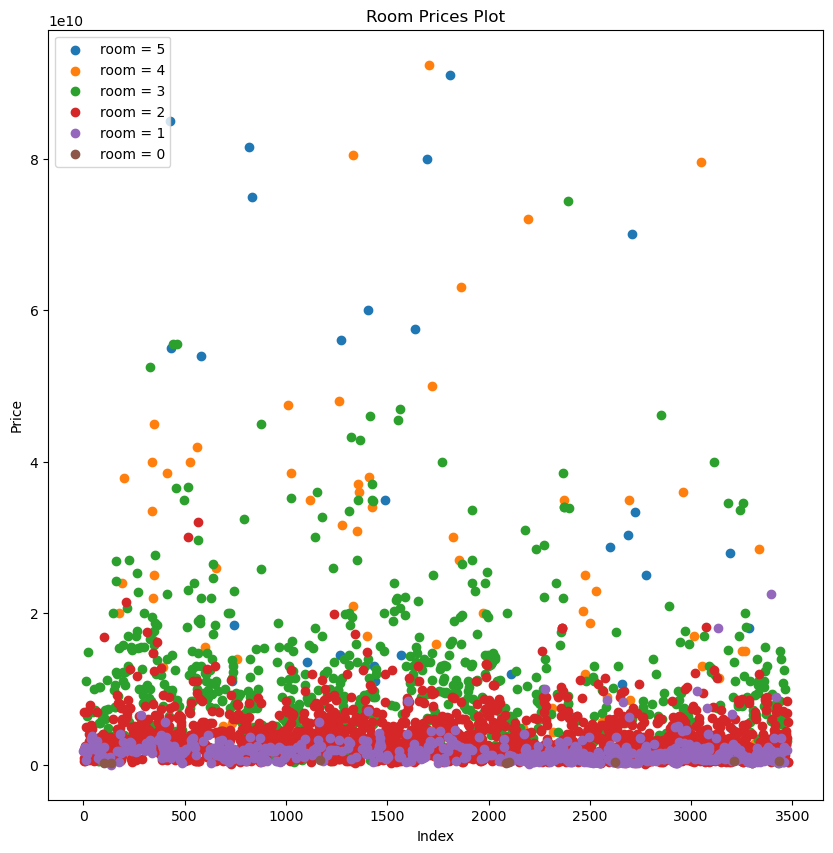

In [234]:
# plot area of all rooms
plt.figure(figsize=(10, 10))


plt.scatter(df_room_5.index, df_room_5['Price'], label = 'room = 5')
plt.scatter(df_room_4.index, df_room_4['Price'], label = 'room = 4')
plt.scatter(df_room_3.index, df_room_3['Price'], label = 'room = 3')
plt.scatter(df_room_2.index, df_room_2['Price'], label = 'room = 2')
plt.scatter(df_room_1.index, df_room_1['Price'], label = 'room = 1')
plt.scatter(df_room_0.index, df_room_0['Price'], label = 'room = 0')

plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Room Prices Plot')
plt.legend()
plt.show()

In [235]:
from sklearn import linear_model

In [236]:
# create mask and split data into training and testing sets
mask = np.random.rand(len(df_cleaned)) < 0.8
print(mask)

train = df_cleaned[mask]
test = df_cleaned[~mask]

[ True  True  True ...  True  True  True]


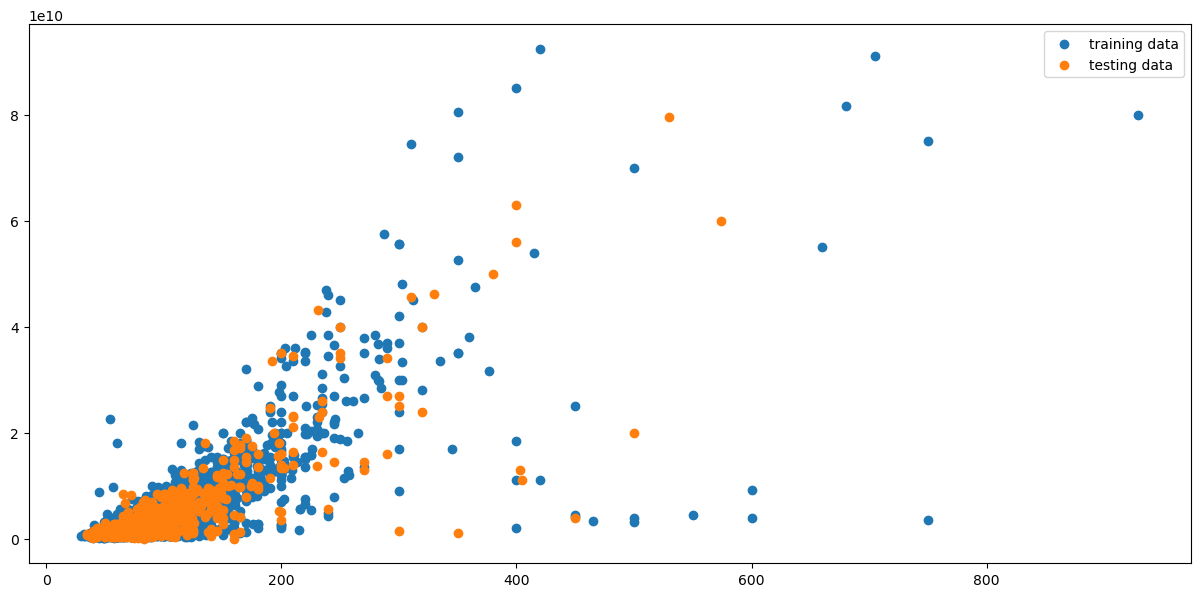

In [237]:

plt.figure(figsize=(15, 7))
plt.scatter(train['Area'], train['Price'], label = 'training data')
plt.scatter(test['Area'], test['Price'], label = 'testing data')

plt.legend()
plt.show()

In [244]:
# creating list for test and tran of multiple linear regression
m_regression = linear_model.LinearRegression()

# train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
train_x = np.asanyarray(train[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_Encoded']])
train_y = np.asanyarray(train[['Price']])


In [245]:
m_regression.fit(train_x, train_y)

LinearRegression()

In [246]:
# print the coefficients
print ('Coefficients: ', m_regression.coef_)
print ('Intercept: ',m_regression.intercept_)

Coefficients:  [[ 6.56884660e+07  5.41937818e+07 -4.94139860e+08  2.27963367e+08
  -1.20647456e+08  6.36714868e-01]]
Intercept:  [-4.79679378e+09]


In [247]:
from sklearn.metrics import r2_score

In [248]:

test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator', 'Address_Encoded']])
# test_x = np.asanyarray(test[['Area', 'Room', 'Parking', 'Warehouse', 'Elevator']])
test_y_predict = m_regression.predict(test_x)
test_y = test[['Price']]

print(f'mean absolute error: {np.mean(np.abs(test_y_predict - test_y))}')
print(f'Mean Squared error: {np.mean((test_y_predict - test_y) ** 2)}')
print(f'R2-score: {r2_score(test_y_predict, test_y)}')

mean absolute error: 1965448435.813588
Mean Squared error: 1.636392656503265e+19
R2-score: 0.6394701148810158


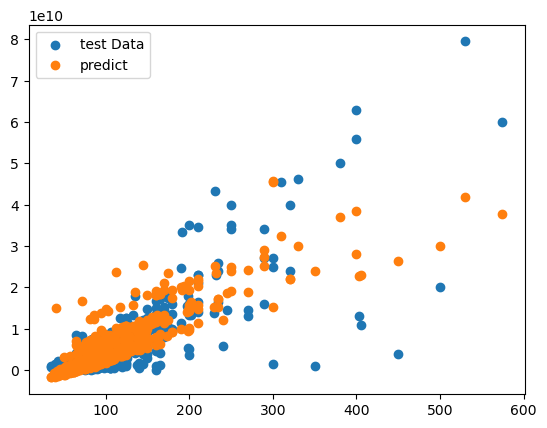

In [249]:

plt.scatter(test['Area'], test['Price'], label='test Data')
plt.scatter(test['Area'], test_y_predict, label='predict')
plt.legend()
plt.show()